Manipulando Arquivos de Dados
============
Neste exemplo você irá aprender a carregar arquivos contendo informações (exportadas de algum banco de dados, sistema ou repositório) e a analisar analisar as informações contidas neles.

**Antes de iniciar a atividade:**

- **Baixe o arquivo de dados entitulado 'extratoppgc.csv', disponibilizado no Moodle (o arquivo contém dados reais, mas incompletos, os quais podem ser obtidos de maneira pública);**
- **Suba esse arquivo na plataforma Jupyter. Para tanto, vá ao menu 'Data > Upload' e escolha o arquivo 'extratoppgc.csv' que você baixou no passo anterior (se o ambiente perguntar onde colocar o arquivo, escolha a pasta 'library');** 
- **Depois de ter encaminhado o arquivo, use o código seguinte para abrí-lo.** 

Lembre-se de que para executar o código é necessário selecionar a célula que o contém e utilizar o botão "play" no menu superior. Você também pode mandar executar todas as células de uma única vez escolhendo a opção "Run all" no menu "Cell".

In [1]:
# pandas é uma biblioteca para manipulação de tabelas de dados
import pandas as pd

# Nome do arquivo de dados
arquivo = 'exemplo.csv'

print("Lendo arquivo: ", arquivo)

# lê o arquivo e coloca o resultado em um dataframe chamado 'df'
#df = pd.read_csv(arquivo, encoding='cp860',sep=";") 
df = pd.read_csv(arquivo, sep=";") 

print("Arquivo lido.")

Lendo arquivo:  exemplo.csv
Arquivo lido.


**Para saber quais são as colunas que esse arquivo possui, use o seguinte comando:**

In [39]:
print(df.columns)

Index(['Alunos', 'P1', 'P2', 'P3'], dtype='object')


**Para ver o conteúdo do dataframe, use o seguinte comando:**

In [40]:
print(df)

    Alunos  P1  P2  P3
0    Jorge   8   8   9
1    Jorge   8   2   5
2    Jorge   7   1   1
3   Carlos   6   7   0
4    Kevin   2   9   2
5  Antonio   3   8   8
6   Marcia   1   4  10


In [41]:
# para ver o resultado em forma de tabela, simplesmente solicite o dataframe:
df

,Alunos,P1,P2,P3
0,Jorge,8,8,9
1,Jorge,8,2,5
2,Jorge,7,1,1
3,Carlos,6,7,0
4,Kevin,2,9,2
5,Antonio,3,8,8
6,Marcia,1,4,10


**Vamos agora utilizar a bibliteca 'pandas' para: **
- **verificar quantos artigos (no total) são produzidos por ano, no programa PPGC;**
- **montar uma tabela que demonstre quantos artigos por tipo (periódico ou conferência) são publicados por ano.** 
- **mostrar um gráfico em barras que compare a produção de cada tipo, por ano);**
- **montar uma tabela que demonstre a quantidade total de artigos por QUALIS;**
- **extratificar a tabela anterior, demonstrando a quantidade de artigos em cada tipo de qualis, por ano, além de gráficos em linha que demonstrem a evolução da produção no período;**
- **montar uma tabela e um gráfico que demonstre informações estatísticas (mediana, moda, desvio padrão, etc.).** 


In [42]:
# habilita a geração de gráficos no Jupyter
%matplotlib inline

# Seleciona somente os registros que são efetivamente do PPGC e coloca em um novo 
# dataframe chamado 'prodPPGC':
prodPPGC = df[df['Alunos']== 'Jorge']
prodPPGC

,Alunos,P1,P2,P3
0,Jorge,8,8,9
1,Jorge,8,2,5
2,Jorge,7,1,1


In [43]:
# Mostra 2 primeiros registros do dataframe (só para mostrar que dá para filtrar)
prodPPGC.head(2)

,Alunos,P1,P2,P3
0,Jorge,8,8,9
1,Jorge,8,2,5


In [44]:
# Remove a coluna PPGC do dataframe, pois ela não é mais necessária (afinal, agora ele só tem dados do PPGC)
prodPPGC = prodPPGC.drop(['Alunos'], axis=1)
prodPPGC

,P1,P2,P3
0,8,8,9
1,8,2,5
2,7,1,1


In [45]:
# Agrupa os registros por tipo de produção e coloca em 'prodPPGCByTipos':
prodPPGCByTipos = prodPPGC.groupby('P1')

In [80]:
# Mostra os 2 primeiros registros do dataset resultante 
# (como há 2 grupos de dados, um para cada tipo de produção, i.e., periódicos e conferências), 
# acaba mostrando 4, ou seja, 2 para cada grupo):
prodPPGCByTipos#.head(2)

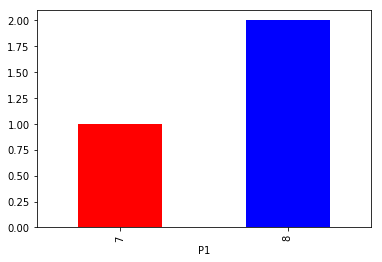

In [47]:
# verifica o tamanho (quantidade de itens) de cada grupo e mostra gráfico em barras
prodPPGCByTipos.size().plot.bar(color=['red', 'blue'])

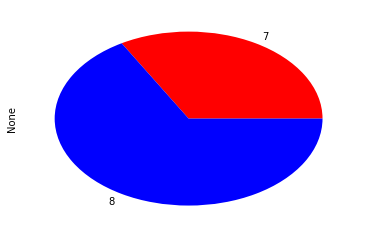

In [48]:
# verifica o tamanho (quantidade de itens) de cada grupo e mostra gráfico em pizza
prodPPGCByTipos.size().plot.pie(colors=['red', 'blue'])

Text(0.5,1,'PUBLICAÃ\x87Ã\x95ES POR TIPO')

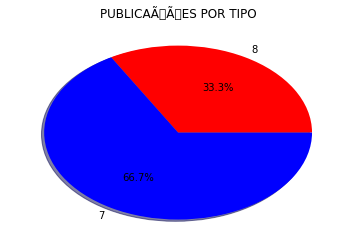

In [49]:
# personalizando o gráfico
import matplotlib.pyplot as plot
plot.pie(prodPPGCByTipos.size(), colors=['red', 'blue'], labels=prodPPGCByTipos.groups.keys(), shadow=True,autopct='%1.1f%%')
plot.title('PUBLICAÃÃES POR TIPO')

In [50]:
# Agrupa por ano:
prodPPGCByAno = prodPPGC.groupby('Ano')

# conta quantos registros cada grupo (ano) possui
resultado = prodPPGCByAno.count()

# troca o nome da coluna 
resultado.rename(columns={'Qualis': 'Quantidade'}, inplace=True)

# mostra quantidade por ano, em forma de tabela
resultado[['Quantidade']]

KeyError: 'Ano'

In [ ]:
# Motra quantidade total de artigos por ano em um gráfico em barras
resultado['Quantidade'].plot.bar()

# também poderia ter feito direto: prodPPGCByAno.size().plot.bar()

In [ ]:
# Agrupa dados de produção por ano e, dentro do ano, por tipo
prodPPGCByTipoporAno = prodPPGC.groupby(['Ano','Tipo'])
# ou prodPPGCByTipoporAno = prodPPGC.groupby([prodPPGC['Ano'],prodPPGC['Tipo']])

resultado = prodPPGCByTipoporAno.size().unstack()

In [ ]:
# Tabela com a quantidade de artigos por tipo de qualis, por ano:
resultado.columns.values[0] =  'Artigos em Conferências'
resultado.columns.values[1] =  'Artigos em Periódicos'
resultado

In [ ]:
# Tabela alternativa, agrupada por categorias em linhas:
resultadoalternativo = prodPPGCByTipoporAno.count()
resultadoalternativo.columns.values[0] =  'Quantidade'
resultadoalternativo[['Quantidade']]

In [ ]:
# gráfico 
resultado.plot.bar(color=['red', 'blue'])
# tente o seguinte e analise se há diferença: 
#prodPPGCByTipoporAno.size().plot.bar(color=['red', 'blue'])

In [ ]:
# mesmo gráfico, mas com barras empilhadas
resultado.plot.bar(color=['red', 'blue'], stacked=True).legend(title='Tipo de publicação', loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
# gráfico em linhas
resultado = prodPPGCByTipoporAno.size().unstack()
resultado.columns.values[0] =  'Artigos em ConferÃªncias'
resultado.columns.values[1] =  'Artigos em PeriÃ³dicos'
resultado = resultado.reset_index()
resultado["Ano"] = resultado["Ano"].astype("category")
resultado.index = resultado['Ano']
resultado.plot.line(color=['red', 'blue'], linewidth=3, grid=True, marker='x').legend(title='Tipo de publicaÃ§Ã£o', loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
# Quantidade total de artigos no período, por QUALIS
prodPPGCByQualis = prodPPGC.groupby(['Qualis'])
resultado = prodPPGCByQualis.count()[['Tipo']].rename(columns={'Tipo': 'Quantidade'})
resultado

In [ ]:
# resultado em um gráfico de barras
resultado.plot.bar()

In [ ]:
# Quantidade de artigos por qualis no período, extratificado por ano 
resultado = prodPPGC.groupby(['Ano','Qualis']).size()
resultado.unstack()

In [ ]:
# grráfico em barras empilhadas
resultado.unstack().plot.bar(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
# mostra linhas com a evolução da quantidade por ano, por qualis
resultado.unstack().plot.line(linewidth=3).legend(loc='center left', bbox_to_anchor=(1, 0.5)) # melhore o grÃ¡fico, ajustando as legendas...

In [ ]:
# mostra tabela com a evolução da quantidade por ano, extratificada por tipo e por qualis
resultado = prodPPGC.groupby(['Ano','Tipo', 'Qualis']).size().unstack()
resultado

In [ ]:
# Gráfico
resultado.plot(kind='bar', stacked=True)

In [ ]:
# Tabela de produção anual, por tipo de publicação vs qualis
resultado = prodPPGC.groupby(['Tipo','Ano', 'Qualis']).size().unstack()
resultado

In [ ]:
# Mostra a quantidade de artigos no período que possuem alunos da graduação como autores:
prodPPGC[prodPPGC['Aut.Grad']>0]['Ano'].count()

In [ ]:
# a quantidade de artigos que possuem alunos da graduação, por ano:
prodPPGC[prodPPGC['Aut.Grad']>0].groupby('Ano')['Tipo'].count()

In [ ]:
# a média anual de artigos com Qualis A1, no período
prodPPGC[prodPPGC['Qualis']=='A1'].groupby('Ano').count()['Tipo'].mean()

Exemplo 2
-----------

O **trecho de código a seguir** abre um arquivo CSV disponibilizado pelo professor no seu espaço  pessoal no GitHub usando a biblioteca *`pandas`* (ver http://pandas.pydata.org/ para detalhes sobre ela).

O arquivo contém um trecho dos dados do ENADE de 2014.

Os **dados originais** podem ser obtidos em:
http://dados.gov.br/dataset/microdados-do-exame-nacional-de-desempenho-de-estudantes-enade

Em especial, para este exemplo, foram obtidos os dados de 2014:
http://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2014.zip

Eles foram coletados, extraídos e disponibilizados na URI especificada no código seguinte. 

**Execute-o e perceba que é muito simples coletar dados disponibilizados na Web!**

In [3]:
import pandas as pd

# local onde está o arquivo de dados
#uri = 'http://raw.githubusercontent.com/lwives/mlp/master/2014.csv' 

uri = 'http://raw.githubusercontent.com/lwives/mlp/master/enade.csv'

print("Baixando arquivo: ", uri)    
# Lê o arquivo de dados a partir da URI/URL
# Detalhes de funcionamento em: http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table 
df = pd.read_csv(uri, sep=";")
print("Arquivo baixado!")    

Baixando arquivo:  http://raw.githubusercontent.com/lwives/mlp/master/enade.csv
Arquivo baixado!


**O trecho seguinte mostra o conteúdo lido e presente na estrutura interna (dataframe)**

In [54]:
df

,nu_ano,co_grupo,co_ies,co_catad,co_orgac,co_munic_curso,co_uf_curso,co_regiao_curso,nu_idade,tp_sexo,...,nt_fg_d2,nt_dis_fg,nt_fg,nt_obj_ce,nt_ce_d1,nt_ce_d2,nt_ce_d3,nt_dis_ce,nt_ce,nt_ger
0,2014,2001,953,10008,10028,3548500,35,3,32,F,...,77,76.5,45.6,36.4,30.0,10,0,13.3,32.9,36.1
1,2014,904,739,10008,10020,3201209,32,3,25,F,...,79,87.5,87.5,68.2,50.0,0,75,41.7,64.2,70.0
2,2014,5710,878,10008,10020,3119401,31,3,30,M,...,76,78.0,91.2,52.9,100.0,0,55,51.7,52.7,62.3
3,2014,6208,227,10008,10028,3548500,35,3,23,F,...,50,62.0,77.3,33.3,60.0,40,30,43.3,34.8,45.4
4,2014,21,402,10008,10020,5300108,53,5,22,M,...,25,49.0,79.6,57.1,35.0,25,0,20.0,51.5,58.5
5,2014,3502,24,10001,10028,2913606,29,2,49,M,...,18,20.5,30.7,45.5,0.0,0,0,0.0,38.7,36.7
6,2014,6208,3983,10008,10020,3126109,31,3,23,F,...,95,90.5,73.7,28.6,40.0,10,30,26.7,28.3,39.7
7,2014,2001,953,10008,10028,3548500,35,3,47,F,...,61,70.0,73.0,77.3,30.0,0,0,10.0,67.2,68.7
8,2014,3502,4,10002,10028,1302603,13,1,21,F,...,51,75.0,75.0,54.5,0.0,0,0,0.0,46.3,53.5
9,2014,2001,1736,10008,10020,3303302,33,3,36,F,...,32,16.0,28.9,40.9,25.0,0,40,21.7,38.0,35.7


**O trecho seguinte mostra as colunas (atributos) que foram lidos do arquivo:**

In [55]:
print("Column headers", df.columns)

Column headers Index(['nu_ano', 'co_grupo', 'co_ies', 'co_catad', 'co_orgac',
       'co_munic_curso', 'co_uf_curso', 'co_regiao_curso', 'nu_idade',
       'tp_sexo', 'ano_fim_2g', 'ano_in_grad', 'nt_obj_fg', 'nt_fg_d1',
       'nt_fg_d2', 'nt_dis_fg', 'nt_fg', 'nt_obj_ce', 'nt_ce_d1', 'nt_ce_d2',
       'nt_ce_d3', 'nt_dis_ce', 'nt_ce', 'nt_ger'],
      dtype='object')


**A definição de o que significa cada coluna está disponível no portal do INEP (mais especificamente em uma subpasta dentro do arquivo disponível em http://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2014.zip).**

**O trecho seguinte mostra um sumário estatístico do arquivo:**

In [56]:
df.describe()

,nu_ano,co_grupo,co_ies,co_catad,co_orgac,co_munic_curso,co_uf_curso,co_regiao_curso,nu_idade,ano_fim_2g,...,nt_fg_d2,nt_dis_fg,nt_fg,nt_obj_ce,nt_ce_d1,nt_ce_d2,nt_ce_d3,nt_dis_ce,nt_ce,nt_ger
count,103527.000000,103527.000000,103527.000000,103527.000000,103527.000000,1.035270e+05,103527.000000,103527.000000,103527.000000,103527.000000,...,103527.000000,103527.000000,103527.00000,103527.000000,103527.000000,103527.000000,103527.000000,103527.000000,103527.000000,103527.000000
mean,2012.929622,1170.901639,1334.117206,3579.492567,3843.070339,3.488438e+06,34.699875,3.130806,29.121872,2003.448434,...,45.180745,43.721237,47.55058,42.854823,19.893603,19.492548,23.193515,20.865545,39.561384,41.571029
std,0.912064,1816.870645,2112.197192,4791.183458,4873.211331,8.988108e+05,8.993021,1.002039,8.112592,6.464371,...,27.271509,24.101488,18.06025,17.687189,24.946590,24.545521,27.024691,18.569604,16.296952,14.722521
min,2012.000000,1.000000,1.000000,1.000000,1.000000,1.100023e+06,11.000000,1.000000,18.000000,1945.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,6.000000,322.000000,2.000000,1.000000,3.106200e+06,31.000000,3.000000,23.000000,2001.000000,...,27.000000,30.000000,35.60000,30.000000,0.000000,0.000000,0.000000,3.300000,27.600000,31.000000
50%,2013.000000,84.000000,591.000000,4.000000,3.000000,3.529401e+06,35.000000,3.000000,26.000000,2006.000000,...,50.000000,47.500000,48.00000,42.100000,10.000000,10.000000,15.000000,18.300000,38.700000,41.200000
75%,2014.000000,2001.000000,1491.000000,10002.000000,10022.000000,4.113700e+06,41.000000,4.000000,33.000000,2008.000000,...,65.000000,61.000000,60.20000,55.000000,35.000000,35.000000,40.000000,33.300000,50.800000,51.800000
max,2014.000000,6405.000000,19512.000000,10009.000000,10028.000000,5.300108e+06,53.000000,5.000000,88.000000,2014.000000,...,100.000000,98.500000,99.00000,100.000000,100.000000,100.000000,100.000000,100.000000,94.300000,94.100000


**Perceba que alguns atributos são *categóricos* e algumas das métricas não fazem sentido (p. ex., média para o ano). Mas podemos mudar a semêntica dos atributos... **

**Por exemplo, o trecho seguinte cria um novo atributo chamado "ano", tendo como base o atributo "nu_ano", mas em formato categórico. Depois, solicita para gerar dados estatísticos deste novo atributo:**

In [57]:
df["ano"] = df["nu_ano"].astype("category")
df["ano"].describe()

count     103527
unique         3
top         2012
freq       46959
Name: ano, dtype: int64

**Também podemos pegar um subconjunto dos dados ou um dos atributos e colocá-los em ordem. O trecho seguinte seleciona a coluna relativa ao ano de conclusão do 2o grau e mostra os registros em ordem crescente, por este campo:**

In [58]:
df['ano_fim_2g'].sort_values()

80035    1945
36663    1955
65320    1956
60939    1957
64470    1958
65673    1961
62917    1961
62079    1962
17514    1963
69664    1963
53979    1964
75886    1964
58569    1964
93151    1964
52097    1964
75293    1965
22856    1965
39059    1965
76270    1965
79190    1965
51204    1965
32965    1965
9308     1965
21981    1966
74918    1966
43190    1966
41168    1966
50273    1966
32229    1966
32475    1966
         ... 
34033    2013
29004    2013
21719    2013
25329    2013
35671    2013
17754    2013
20861    2013
889      2013
11009    2013
17735    2013
18888    2013
9754     2013
30271    2013
29809    2013
34141    2013
37998    2013
36998    2013
1563     2013
4092     2013
4413     2013
8641     2013
32283    2013
243      2013
432      2013
2929     2013
13386    2013
13603    2013
12269    2014
16448    2014
30034    2014
Name: ano_fim_2g, dtype: int64

**Já o trecho seguinte cria uma nova tabela (data-frame) que contém as notas gerais dos alunos (Nota bruta da prova, i.e., a média ponderada da formação geral (25%) e componente específico (75%) (0 a 100)), ordenadas por ano de finalização do 2o grau:**

In [59]:
df2 = df[['ano_fim_2g','nt_ger']]
df2.sort_values(by='ano_fim_2g')

,ano_fim_2g,nt_ger
80035,1945,12.8
36663,1955,49.3
65320,1956,44.2
60939,1957,55.5
64470,1958,37.5
65673,1961,29.7
62917,1961,26.2
62079,1962,30.6
17514,1963,17.8
69664,1963,47.6


**Para ter uma ideia dos tipos de visualização disponíveis, consulte: 
http://pandas.pydata.org/pandas-docs/version/0.9.0/visualization.html**

**Para uma visão geral (de 10 minutos) sobre o que você pode fazer com a biblioteca "Pandas", consulte: http://pandas.pydata.org/pandas-docs/stable/10min.html**

Exercícios
-----------

1. Monte um gráfico em barras que mostre a quantidade de pessoas que fizeram a prova, por ano;
2. Monte um gráfico em barras que mostre a média das notas agrupadas por ano de conclusão do 2o grau;
3. Agrupe os dados por sexo e monte um gráfico em forma de pizza que demonstre a porcentagem geral de pessoas por sexo;
4. Monte uma tabela que demonstre informações estatísticas relacionadas com a nota (média, desvio padrão, variância), por ano de conclusão.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

df3 = df.groupby('nu_ano')
#df3.size().plot.bar(color=['red', 'blue','green'])

df6 = df[['ano_fim_2g','nt_ger']]
df7 = df6.groupby('ano_fim_2g').mean()
print (df7)
df7 = df7[0:5]
#df7.plot.bar()

df5 = df.groupby('tp_sexo')
#df5.size().plot.pie(colors=['red', 'blue'],autopct='%1.1f%%')

#df6 = df[['nt_ger','ano_fim_2g']]
df6["ano"] = df["ano_fim_2g"].astype("category")
#df6.describe()

               nt_ger
ano_fim_2g           
1945        12.800000
1955        49.300000
1956        44.200000
1957        55.500000
1958        37.500000
1961        27.950000
1962        30.600000
1963        32.700000
1964        38.360000
1965        36.712500
1966        39.357143
1967        34.500000
1968        39.033333
1969        42.881250
1970        39.263333
1971        44.826667
1972        37.751613
1973        40.588889
1974        38.061290
1975        38.055556
1976        41.127397
1977        40.360156
1978        38.880240
1979        38.122727
1980        42.706584
1981        41.705200
1982        40.552830
1983        41.418239
1984        41.122500
1985        41.421573
1986        39.664612
1987        39.928486
1988        41.459215
1989        41.813494
1990        41.176245
1991        41.502516
1992        41.175982
1993        41.400879
1994        41.480811
1995        40.595394
1996        40.702095
1997        40.935794
1998        40.845816
1999      

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
